<a href="https://colab.research.google.com/github/mateuszrajca69/Uczenie-maszynowe/blob/main/Zadanie3_Mateusz_Rajca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

import sys, os
if 'google.colab' in sys.modules and not os.path.exists('.setup_complete'):
    !wget -q https://raw.githubusercontent.com/yandexdataschool/Practical_RL/coursera/week2_model_based/mdp.py

In [ ]:
transition_probs = {
    's0': {
        'a1': {'s1': 1},

    },
    's1': {
        'a0': {'s0': 0.9,'s2':0.1},
        'a1': {'s4': 1},
        'a2': {'s2': 1}
    },
    's2':{'a3':{'s1': 0.75,'s3':0.25},
          'a1':{'s3':1}
        
    },
    's3':{'a3':{'s2':0.5,'s4':0.5}   
    },
    's4':{}
}

rewards = {
    's3': {'a3': {'s4':100}},

}

from mdp import MDP
mdp = MDP(transition_probs, rewards, initial_state='s0')



In [ ]:
mdp.get_all_states()

('s0', 's1', 's2', 's3', 's4')

In [ ]:
mdp.get_possible_actions('s1')

('a0', 'a1', 'a2')

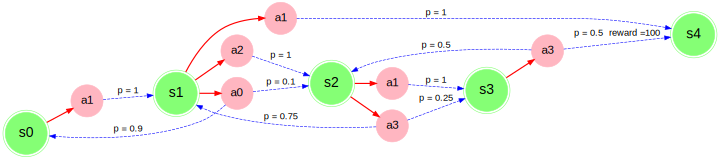

In [ ]:
from mdp import has_graphviz
from IPython.display import display

if has_graphviz:
    from mdp import plot_graph
    display(plot_graph(mdp))

In [ ]:
import random
state = mdp.reset()

for t in range(200):

  action = random.choice(mdp.get_possible_actions(state))
  observation, reward, done, info = mdp.step(action)
  state = observation

  print(t, observation, reward, done)
  # t to numer próby, s1/2 to stan obserwacji, reward to wartość nagrody

  if done:
    break

0 s1 0.0 False
1 s4 0.0 True


In [ ]:
def get_action_value(mdp, state_values, state, action, gamma):
  Q = 0.

  for next_state in mdp.get_next_states(state, action):
    
    prob = mdp.get_transition_prob(state, action, next_state)
    reward = mdp.get_reward(state, action, next_state)
    Q += prob * (reward + (gamma * state_values[next_state]))

  return Q

In [ ]:
def get_new_state_value(mdp, state_values, state, gamma):
  
  if mdp.is_terminal(state):
    return 0

  return max([get_action_value(mdp, state_values, state, action, gamma) for action in mdp.get_possible_actions(state)])

In [ ]:
gamma = 0.93
num_iter = 78
min_diff = 0.01

state_values = {s: 0 for s in mdp.get_all_states()}

for t in range(num_iter):

    new_state_values = {state: get_new_state_value(mdp, state_values, state, gamma) for state in mdp.get_all_states()}

    diff = max(abs(new_state_values[s] - state_values[s]) for s in mdp.get_all_states())

    print(t, diff, state_values)

    state_values = new_state_values

    if diff < min_diff:
        break

0 50.0 {'s0': 0, 's1': 0, 's2': 0, 's3': 0, 's4': 0}
1 46.5 {'s0': 0.0, 's1': 0.0, 's2': 0.0, 's3': 50.0, 's4': 0}
2 43.245000000000005 {'s0': 0.0, 's1': 0.0, 's2': 46.5, 's3': 50.0, 's4': 0}
3 40.217850000000006 {'s0': 0.0, 's1': 43.245000000000005, 's2': 46.5, 's3': 71.6225, 's4': 0}
4 18.701300249999996 {'s0': 40.217850000000006, 's1': 43.245000000000005, 's2': 66.608925, 's3': 71.6225, 's4': 0}
5 17.3922092325 {'s0': 40.217850000000006, 's1': 61.94630025, 's2': 66.608925, 's3': 80.973150125, 's4': 0}
6 8.087377293112517 {'s0': 57.61005923250001, 's1': 61.94630025, 's2': 75.30502961625001, 's3': 80.973150125, 's4': 0}
7 7.521260882594632 {'s0': 57.61005923250001, 's1': 70.03367754311252, 's2': 75.30502961625001, 's3': 85.01683877155625, 's4': 0}
8 3.4973863104064975 {'s0': 65.13132011509464, 's1': 70.03367754311252, 's2': 79.06566005754732, 's3': 85.01683877155625, 's4': 0}
9 3.2525692686780445 {'s0': 65.13132011509464, 's1': 73.53106385351902, 's2': 79.06566005754732, 's3': 86.7655

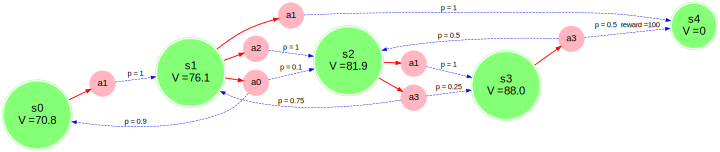

In [ ]:
if has_graphviz:
  from mdp import plot_graph_with_state_values
  display(plot_graph_with_state_values(mdp, state_values))

  #graf wartości stanów

In [ ]:
def get_optimal_action(mdp, state_values, state, gamma):
    if mdp.is_terminal(state):
        return None
    
    action_values = [get_action_value(mdp, state_values, state, action, gamma) for action in mdp.get_possible_actions(state)]
    argmax_index = np.argmax(action_values)
    return mdp.get_possible_actions(state)[argmax_index]

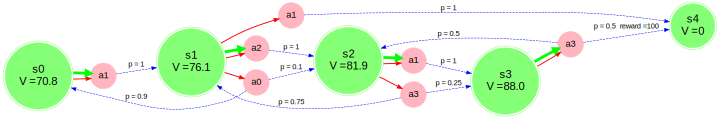

In [ ]:
if has_graphviz:
    from mdp import plot_graph_optimal_strategy_and_state_values
    display(plot_graph_optimal_strategy_and_state_values(mdp, state_values, get_action_value))

    #graf strategii poruszania się po środowisku

In [ ]:
s = mdp.reset()
mdp.render()

for t in range(100):
    a = get_optimal_action(mdp, state_values, s, gamma)
    s, r, done, _ = mdp.step(a)
    print(t, a, r)
    mdp.render()
    
    if done:
        break

Currently at s0
0 a1 0.0
Currently at s1
1 a2 0.0
Currently at s2
2 a1 0.0
Currently at s3
3 a3 100
Currently at s4


In [ ]:
gamma = 0.98
num_iter = 94
min_diff = 0.001

state_values = {s: 0 for s in mdp.get_all_states()}

for t in range(num_iter):

    new_state_values = {state: get_new_state_value(mdp, state_values, state, gamma) for state in mdp.get_all_states()}

    diff = max(abs(new_state_values[s] - state_values[s]) for s in mdp.get_all_states())

    print(t, diff, state_values)

    state_values = new_state_values

    if diff < min_diff:
        break

0 50.0 {'s0': 0, 's1': 0, 's2': 0, 's3': 0, 's4': 0}
1 49.0 {'s0': 0.0, 's1': 0.0, 's2': 0.0, 's3': 50.0, 's4': 0}
2 48.019999999999996 {'s0': 0.0, 's1': 0.0, 's2': 49.0, 's3': 50.0, 's4': 0}
3 47.059599999999996 {'s0': 0.0, 's1': 48.019999999999996, 's2': 49.0, 's3': 74.00999999999999, 's4': 0}
4 23.059203999999994 {'s0': 47.059599999999996, 's1': 48.019999999999996, 's2': 72.5298, 's3': 74.00999999999999, 's4': 0}
5 22.59801991999999 {'s0': 47.059599999999996, 's1': 71.07920399999999, 's2': 72.5298, 's3': 85.539602, 's4': 0}
6 11.073029760800011 {'s0': 69.65761991999999, 's1': 71.07920399999999, 's2': 83.82880996, 's3': 85.539602, 's4': 0}
7 10.85156916558401 {'s0': 69.65761991999999, 's1': 82.1522337608, 's2': 83.82880996, 's3': 91.07611688040001, 's4': 0}
8 5.317268891136166 {'s0': 80.509189085584, 's1': 82.1522337608, 's2': 89.254594542792, 's3': 91.07611688040001, 's4': 0}
9 5.210923513313446 {'s0': 80.509189085584, 's1': 87.46950265193617, 's2': 89.254594542792, 's3': 93.7347513

In [ ]:
s = mdp.reset()
mdp.render()

for t in range(100):
    a = get_optimal_action(mdp, state_values, s, gamma)
    s, r, done, _ = mdp.step(a)
    print(t, a, r, done)
    mdp.render()
    
    if done:
        break

Currently at s0
0 a1 0.0 False
Currently at s1
1 a2 0.0 False
Currently at s2
2 a1 0.0 False
Currently at s3
3 a3 0.0 False
Currently at s2
4 a1 0.0 False
Currently at s3
5 a3 100 True
Currently at s4
